<a href="https://colab.research.google.com/github/Hctor11/pytorch-for-deep-learning/blob/main/src/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix


In [37]:
# Convert MNIST images into tensors of 4 dimensions
transform = transforms.ToTensor()

In [38]:
# Train data
train_data = datasets.MNIST(root='/cnn_data',train=True, download=True, transform=transform)

In [39]:
# Test data
test_data = datasets.MNIST(root='/cnn_data',train=False, download=True, transform=transform)

In [40]:
# Loader for our data
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [41]:
# Define our CNN model
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [42]:
# Grab 1 MNIST record
for i, (X_train, y_train) in enumerate(train_data):
  break

In [8]:
X_train.shape

torch.Size([1, 28, 28])

In [43]:
x = X_train.view(1,1,28,28)

In [44]:
# Perform out first convolution
x = F.relu(conv1(x))

In [11]:
x.shape

torch.Size([1, 6, 26, 26])

In [45]:
# passsing thru the pooling layer
x = F.max_pool2d(x,2,2)

In [13]:
x.shape

torch.Size([1, 6, 13, 13])

In [46]:
# Perform our second convolution
x = F.relu(conv2(x))

In [15]:
x.shape

torch.Size([1, 16, 11, 11])

In [47]:
# Pooling layer
x = F.max_pool2d(x,2,2)

In [17]:
x.shape

torch.Size([1, 16, 5, 5])

In [61]:
# Model class
class AwesomeConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)

    # Connection layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  # forward function
  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2,2)

    #second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2,2)

    #flatten data
    X = X.view(-1, 16*5*5)

    # Fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [62]:
# Create an instance of our function
torch.manual_seed(41)
Model = AwesomeConvolutionalNetwork()
Model

AwesomeConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [63]:
# Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(Model.parameters(), lr=0.001)

In [64]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):

  train_corr = 0
  test_corr = 0

  # train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = Model(X_train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_correct = (predicted == y_train).sum()
    train_corr += batch_correct

    # update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # printing training res
    if b%500 == 0:
      print(f'Epoch: {i} \n Batch: {b} \n Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(train_corr)

  # test
  with torch.no_grad():
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = Model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      test_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(test_corr)

current_time = time.time()
total_time = current_time - start_time
print(f'training took: {total_time/60} minutes')

Epoch: 0 
 Batch: 500 
 Loss: 0.33633095026016235
Epoch: 0 
 Batch: 1000 
 Loss: 0.5349848866462708
Epoch: 0 
 Batch: 1500 
 Loss: 0.055179618299007416
Epoch: 0 
 Batch: 2000 
 Loss: 0.5566567182540894
Epoch: 0 
 Batch: 2500 
 Loss: 0.09642040729522705
Epoch: 0 
 Batch: 3000 
 Loss: 0.007758188061416149
Epoch: 0 
 Batch: 3500 
 Loss: 0.004284966737031937
Epoch: 0 
 Batch: 4000 
 Loss: 0.01960762031376362
Epoch: 0 
 Batch: 4500 
 Loss: 0.0008029189775697887
Epoch: 0 
 Batch: 5000 
 Loss: 0.04208856448531151
Epoch: 0 
 Batch: 5500 
 Loss: 0.0018098928267136216
Epoch: 0 
 Batch: 6000 
 Loss: 0.00038789428072050214
Epoch: 1 
 Batch: 500 
 Loss: 0.00829227827489376
Epoch: 1 
 Batch: 1000 
 Loss: 0.012146287597715855
Epoch: 1 
 Batch: 1500 
 Loss: 0.017537157982587814
Epoch: 1 
 Batch: 2000 
 Loss: 0.0019016513833776116
Epoch: 1 
 Batch: 2500 
 Loss: 0.0057013072073459625
Epoch: 1 
 Batch: 3000 
 Loss: 0.0332382395863533
Epoch: 1 
 Batch: 3500 
 Loss: 0.0017011186573654413
Epoch: 1 
 Batch: 

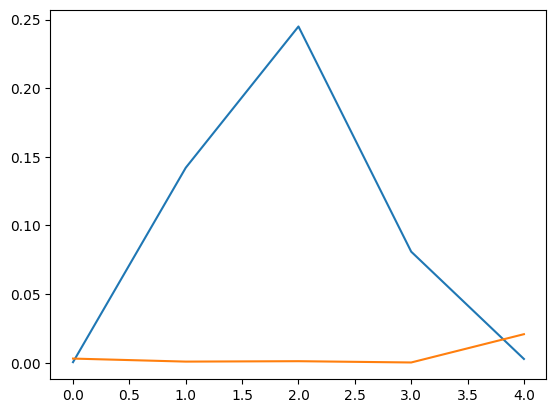

In [66]:
train_losses = [tl.item() for tl in train_losses]

plt.plot(train_losses)
plt.plot(test_losses)